<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Tip_and_Bill_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Розрахуй коефіцієнти кореляції Пірсона та Спірмена між розміром чайових та розміром чека. Чи є взаємозв'язок між ними статистично значущим? **Так, він статистично значущий, p-value < 0.05. По Пірсону 0.675, по Спірману 0.678. Обидва мають позитивну кореляцію**

За допомогою візуалізації визнач, чи схожий розподіл змінних tip та total_bill на нормальний. Який з двох коефіцієнтів кореляції більше підходить під ці вхідні дані? **Total bill більш схожий на нормальний, але якщо робити тест на нормальність розподілу (normaltest), то у обох ненормальний розподіл.**

Розрахуй ступінь тісноти статистичного зв'язку між розміром групи size та розміром чека total_bill. Визнач самостійно, який із коефіцієнтів кореляції тут доречно застосувати. Чи є зв'язок статистично значущим? **Так, звʼязок є статистично значущим 0.604 помірно позитивна кореляція (pvalue < 0.05)**



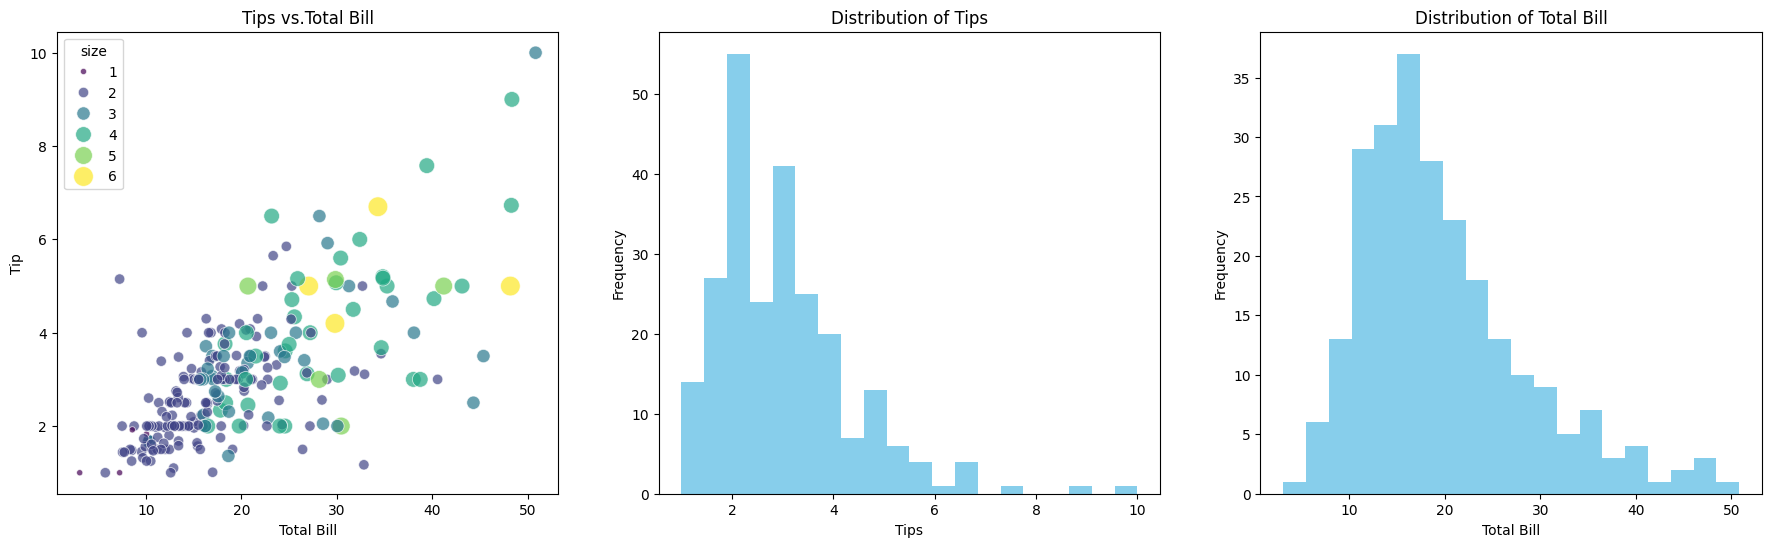

P-value Pearson: PearsonRResult(statistic=0.6757341092113647, pvalue=6.69247064686336e-34)
Pearson Correlation: 0.6757341092113641

P-value Spearman: SignificanceResult(statistic=0.6789681219001009, pvalue=2.501158440923619e-34)
Spearman Correlation: 0.6789681219001009

Spearman P-value size/total bill: SignificanceResult(statistic=0.6047911390994543, pvalue=9.92230778131113e-26)
Spearman Correlation size/total bill: 0.6047911390994543 

Normal test for tips: NormaltestResult(statistic=79.37862574074785, pvalue=5.796294322907102e-18)
Normaltest for total_bill: NormaltestResult(statistic=45.11781912347332, pvalue=1.5951078766352608e-10)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, normaltest

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
sns.scatterplot(data = tips, x = "total_bill", y = "tip", hue = "size", palette = "viridis", size = "size", sizes = (20, 200), alpha = 0.7, ax = ax[0])
ax[0].set_title("Tips vs.Total Bill")
ax[0].set_xlabel("Total Bill")
ax[0].set_ylabel("Tip")

ax[1].hist(tips["tip"], bins = 20, color = "skyblue")
ax[1].set_title("Distribution of Tips")
ax[1].set_xlabel("Tips")
ax[1].set_ylabel("Frequency")

ax[2].hist(tips["total_bill"], bins = 20, color = "skyblue")
ax[2].set_title("Distribution of Total Bill")
ax[2].set_xlabel("Total Bill")
ax[2].set_ylabel("Frequency")
plt.show()

p_value_pearson = pearsonr(tips["tip"], tips["total_bill"])
pearson_corr = tips["tip"].corr(tips["total_bill"])

p_value_spearman = spearmanr(tips["tip"], tips["total_bill"])
spearman_corr = tips["tip"].corr(tips["total_bill"], method = "spearman")

spearman_corr_size_pvalue = spearmanr(tips["size"], tips["total_bill"])
spearman_corr_size = tips["size"].corr(tips["total_bill"], method = "spearman")

pearson_normal_tip = normaltest(tips["tip"])
pearson_normal_total_bill = normaltest(tips["total_bill"])

print(f"P-value Pearson: {p_value_pearson}\nPearson Correlation: {pearson_corr}\n\nP-value Spearman: {p_value_spearman}\nSpearman Correlation: {spearman_corr}")
print(f"\nSpearman P-value size/total bill: {spearman_corr_size_pvalue}\nSpearman Correlation size/total bill: {spearman_corr_size} ")
print(f"\nNormal test for tips: {pearson_normal_tip}\nNormaltest for total_bill: {pearson_normal_total_bill}")